In [35]:
import matplotlib.pyplot as plt
from functions.bva_xml_reader import read_xml_bva
from functions.bva_xml_reader import read_xml_sync
from functions.bva_xml_reader import read_xml_phases
from functions.bva_sync_reader import read_sync_file
import functions.bva_plotting as bvaplt

xml_1 = "data/lp190129_20190129093604_egoalloi_visit_1.xml"
pd_bva_1 = read_xml_bva(xml_1)
bva_sync_times_1 = read_xml_sync(xml_1)
pd_sync_1 = read_sync_file("data/lp190129.csv")

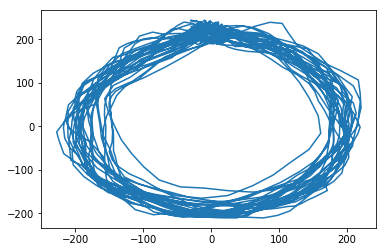

In [36]:
bvaplt.plot_walking(pd_bva_1)

In [37]:
xml_2 = "data/lp190128_20190129100818_egoalloi_visit_2.xml"
pd_bva_2 = read_xml_bva(xml_2)
bva_sync_times_2 = read_xml_sync(xml_2)
pd_sync_2 = read_sync_file("data/lp190129.csv")

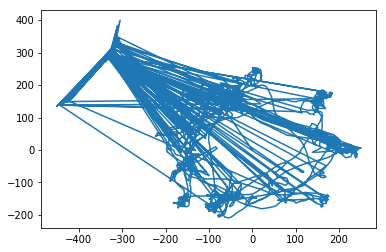

In [38]:
bvaplt.plot_walking(pd_bva_2)

## Comparing the synchro times

(23,)
(24,)


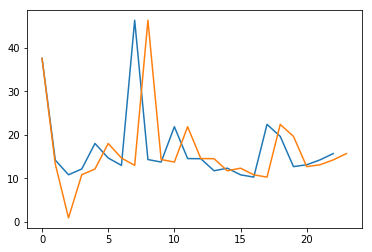

In [39]:
import numpy as np

bva_diffs = np.diff(bva_sync_times_1)
plt.plot(bva_diffs)
print(bva_diffs.shape)

csv_diffs = np.diff(pd_sync_1[pd_sync_2['action']=='KEY: Right']['time'])
print(csv_diffs.shape)

plt.plot(csv_diffs)
plt.show()

We can see that Key right and the eeg seems to correspond well, but there is one more Key right in the csv (24 evens vs 23 in EEG) which doens't correspond to anythings. From the inspection it looks like the third csv event shoudůl be deleted

[ 37.62199998  14.17799997  10.80999994  12.13499999  18.0150001
  14.67000008  12.97099996  46.4059999   14.31100011  13.73600006
  21.87399983  14.53500009  14.50300002  11.72099996  12.32200003
  10.79500008  10.26499987  22.41199994  19.64700007  12.68600011
  13.10500002  14.23099995  15.68199992]
[ 37.622  13.313   0.865  10.81   12.135  18.015  14.67   12.971  46.406
  14.311  13.736  21.874  14.535  14.503  11.721  12.322  10.795  10.265
  22.412  19.647  12.686  13.105  14.231  15.682]


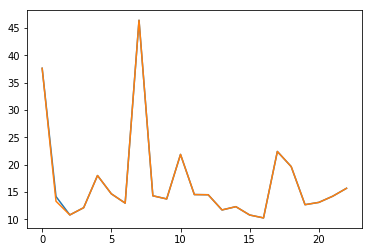

In [40]:
print(bva_diffs)
print(csv_diffs)
csv_diffs = np.delete(csv_diffs, 2)
plt.plot(bva_diffs)
plt.plot(csv_diffs)
plt.show()

Cool it sits well now except the second element. PLotting difference between the timelines

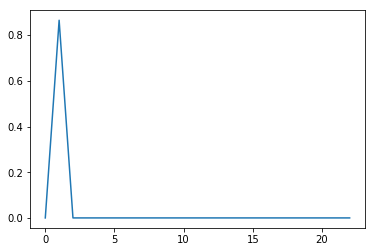

In [41]:
plt.plot(bva_diffs - csv_diffs)
plt.show()